# Convolutional Neural Networks (CNN)


* [Loading the Data Set](#1)
* [Normalization, Reshape and Label Encoding ](#2)
* [Train Test Split](#3)
* [Convolutional Neural Network](#4)
    * [What is Convolution Operation?](#5)
    * [Same Padding](#6)
    * [Max Pooling](#7)
    * [Flattening](#8)
    * [Full Connection](#9)
* [Implementing with Keras](#10)
    * [Create Model](#11)
    * [Define Optimizer](#12)
    * [Compile Model](#13)
    * [Epochs and Batch Size](#14)
    * [Data Augmentation](#15)
    * [Fit the Model](#16)
    * [Evaluate the Model](#17)
* [Deep Learning Tutorial for Beginners](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
* [Artificial Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Convolutional Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Recurrent Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch)
* [Conclusion](#18)


In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from sklearn.model_selection import train_test_split

# Any results you write to the current directory are saved as output.

<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [81]:
# read train 
train = pd.read_csv ('train.csv.zip')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# read test 
test = pd.read_csv ('test.csv.zip')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# put labels into y_train variable
y_train = train['label']

# Drop 'label' column
X = train.drop(columns='label')
print(X.shape)
X.iloc[20100:20120]

(42000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# visualize number of digits classes
print('Uniques labels:', np.sort(y_train.unique()))

Uniques labels: [0 1 2 3 4 5 6 7 8 9]


28.0
(784,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   

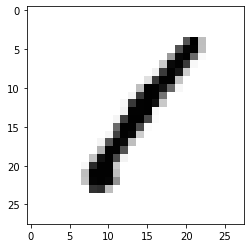

In [95]:
# plot some samples
print(np.sqrt(X.shape[1]))
print(X.iloc[0,:].shape)
print(X.iloc[0,:].values.reshape(28,28))
print(X.iloc[0,:].values.reshape(28,-1).shape)
one_number = X.iloc[0,:].values.reshape(28,28)
plt.imshow(one_number, cmap='Greys')

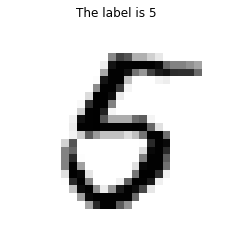

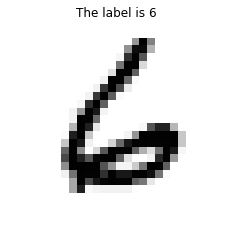

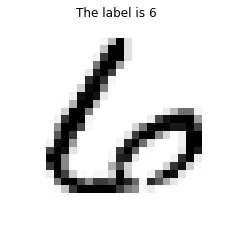

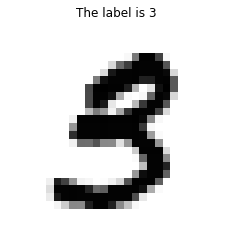

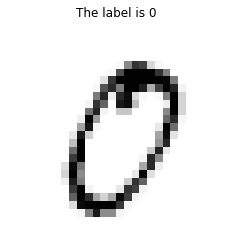

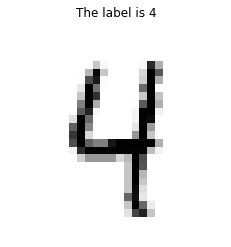

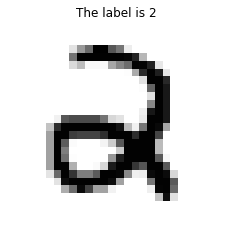

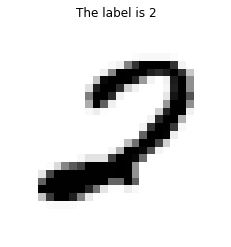

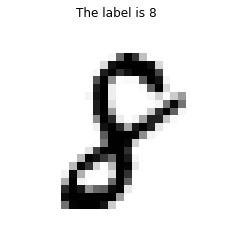

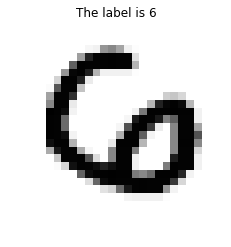

In [96]:
for i in range(40125,40135):
    num = X.iloc[i,:].values.reshape(28,-1)
    plt.imshow(num, cmap='Greys')
    plt.title(f'The label is {y_train.iloc[i]}')
    plt.axis('off')
    plt.show();

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [97]:
print(X.iloc[0,:].max())

255


In [98]:
# Normalize the data
X_std = X.values / 255

In [99]:
# Reshape
X_std.shape

(42000, 784)

In [79]:
# Label Encoding 
y = 

(42000,)

<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [8]:
# Split the train and the validation set for the fitting
X_train

In [9]:
# Some examples


<a id="4"></a>
## Convolutional Neural Network 
* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information. 
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes.
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting. 
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [10]:
# 




<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [11]:
# Define the optimizer


<a id="13"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [12]:
# Compile the model


<a id="14"></a>
### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [13]:
# data augmentation


<a id="16"></a>
### Fit the model

In [14]:
# Fit the model


<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


In [15]:
# Plot the loss and accuracy curves for training and validation 


In [16]:
# confusion matrix
